In [1]:
from pathlib import PosixPath
import random
import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np
from PIL import Image

import tensorflow as tf

from tensorflow.keras import preprocessing

Dataset: https://www.kaggle.com/datasets/ibrahimserouis99/one-piece-image-classifier/data

In [2]:
# Load the model
model = tf.keras.models.load_model("One_Piece_Image_Classifier_Model_v16")

In [3]:
data_path = 'C:/Users/rodri/Documents/Rodrigo/Insper/SetimoSemestre/VComp/CompVision/Projeto/Data/Data'

batch_size = 32
width = 224
height = 224

random.seed(123)
seed = random.randint(0,100)
print(f"Current seed : {seed}")

Current seed : 6


In [4]:
val_dataset = preprocessing.image_dataset_from_directory(
    directory=data_path,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(height, width),
    batch_size=batch_size
)

Found 11737 files belonging to 18 classes.
Using 2347 files for validation.


# Teste com o dataset de validação

1/1 [==============================] - 1s 612ms/step


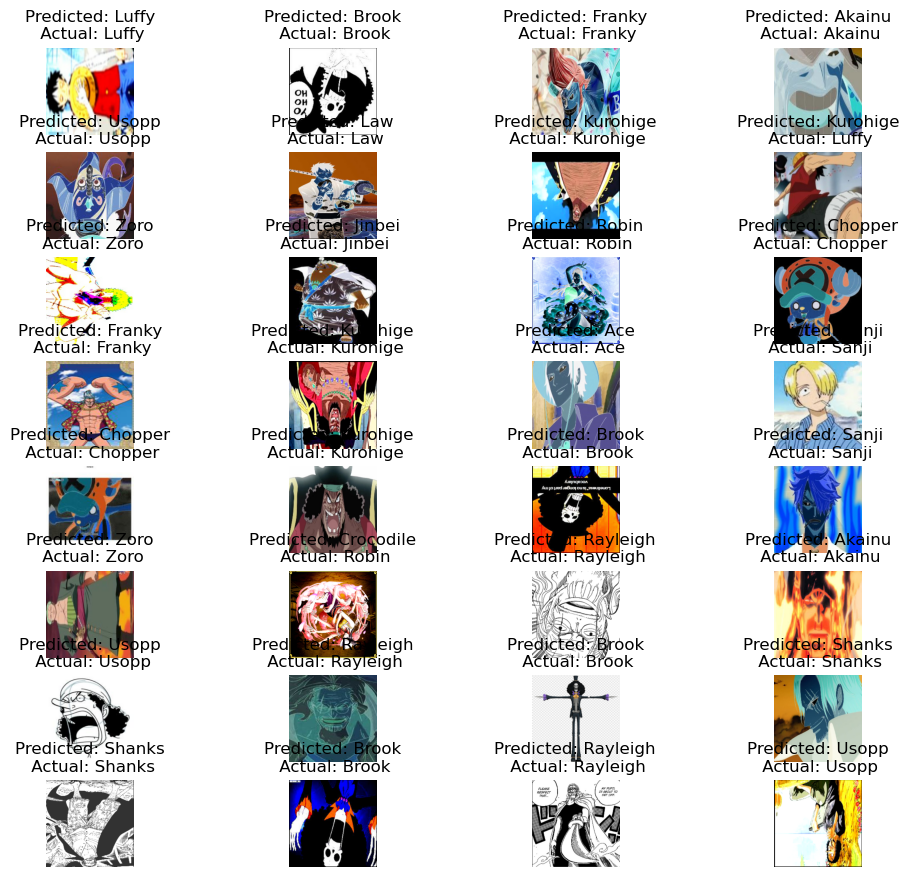

In [5]:
# Create the figure
figure = plt.figure(figsize=(12,12))

t = 0
# Suse the images from the validation dataset 
for images, labels in val_dataset.take(1):
    # Get the predictions
    predictions = model.predict(images)
    # Get the class names
    class_names = val_dataset.class_names
    # Setup the parameters
    columns = 4
    rows = int(len(images) / columns) + 1
    count = 0
    # Loop through the images
    for image, label in zip(images, labels):
        # Plot the image
        plt.subplot(rows, columns, count + 1)
        plt.axis("off")
        plt.imshow(image.numpy().astype("uint8"))
        # Get the predicted label
        predicted_label = np.argmax(predictions[count])
        # Get the actual label
        actual_label = label.numpy()
        # Set the title
        plt.title(f"Predicted: {class_names[predicted_label]}\n Actual: {class_names[actual_label]}")
        count += 1
plt.show()

# Espaço para testar com a imagem que desejar

1/1 [==============================] - 0s 374ms/step
[[2.7021642e-07 2.9961702e-13 1.1419734e-10 3.7652574e-13 1.0586921e-06
  4.5525574e-09 2.7967321e-08 3.2802835e-10 5.4498329e-08 6.7655907e-12
  3.1274490e-07 3.7426159e-10 2.6798855e-07 9.9693495e-01 2.2608854e-10
  5.4497189e-08 7.2812566e-07 2.9885217e-07]]
13
['Ace', 'Akainu', 'Brook', 'Chopper', 'Crocodile', 'Franky', 'Jinbei', 'Kurohige', 'Law', 'Luffy', 'Mihawk', 'Nami', 'Rayleigh', 'Robin', 'Sanji', 'Shanks', 'Usopp', 'Zoro']


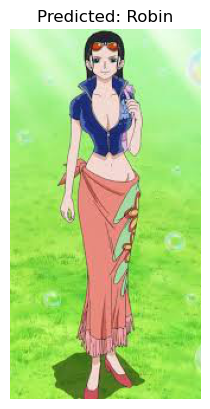

In [6]:
adicional_test = 'teste.jpeg'

ad_t_jpg = Image.open(adicional_test)

# transform the image to a tensor
tensor = tf.io.read_file(adicional_test)
tensor = tf.image.decode_jpeg(tensor) # Alterar caso a imagem seja PNG ou outro formato
tensor = tf.image.resize(tensor, [width, height])
tensor = tf.expand_dims(tensor, axis=0)
adicional_test = tensor


adicional_prediction = model.predict(adicional_test)
print(adicional_prediction)
adicional_class = np.argmax(adicional_prediction)
print(adicional_class)
adicional_class_name = class_names[adicional_class]
print(class_names)

plt.imshow(ad_t_jpg)
plt.axis("off")
plt.title(f"Predicted: {adicional_class_name}")
plt.show()


# Tentando criar um modelo de detecção de persoangens usando uma janela deslizante

Usando uma janela deslizante para detectar objetos em imagens, é possível fazer a detecção de objetos em imagens. A ideia é que a janela deslizante percorra a imagem e, para cada posição, a imagem seja recortada e passada para o modelo de classificação. Se o modelo de classificação retornar um valor acima de um determinado threshold, a janela é considerada como contendo um objeto.

1/1 [==============================] - 0s 376ms/step


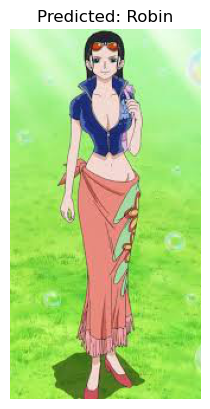

In [37]:
class CustomImageClassifier:
    def __init__(self, model_path, class_names):
        self.model = tf.keras.models.load_model(model_path)
        self.width = 224
        self.height = 224
        self.class_names = class_names
    
    def predict(self, image_path):
        image = Image.open(image_path)
        tensor = tf.io.read_file(image_path)
        tensor = tf.image.decode_jpeg(tensor)
        tensor = tf.image.resize(tensor, [self.width, self.height])
        tensor = tf.expand_dims(tensor, axis=0)
        prediction = self.model.predict(tensor)
        class_index = np.argmax(prediction)
        class_name = self.class_names[class_index]
        best_probability = np.max(prediction)
        general_probabilitys = prediction
        return class_name, best_probability, general_probabilitys
    
    def prediction_probabilitys(self, image_path):
        image = Image.open(image_path)
        tensor = tf.io.read_file(image_path)
        tensor = tf.image.decode_jpeg(tensor)
        tensor = tf.image.resize(tensor, [self.width, self.height])
        tensor = tf.expand_dims(tensor, axis=0)
        prediction = self.model.predict(tensor)
        return prediction

    
    def predict_batch(self, image_paths):
        predictions = []
        for image_path in image_paths:
            predictions.append(self.predict(image_path))
        return predictions
    
    def predict_and_plot(self, image_path):
        image = Image.open(image_path)
        tensor = tf
        tensor = tf.io.read_file(image_path)
        tensor = tf.image.decode_jpeg(tensor)
        tensor = tf.image.resize(tensor, [self.width, self.height])
        tensor = tf.expand_dims(tensor, axis=0)
        prediction = self.model.predict(tensor)
        class_index = np.argmax(prediction)
        class_name = self.class_names[class_index]
        plt.imshow(image)
        plt.axis("off")
        plt.title(f"Predicted: {class_name}")
        

# Create the classifier
classifier = CustomImageClassifier("One_Piece_Image_Classifier_Model_v16", class_names)
# Predict and plot the image
adicional_test = 'teste.jpeg'
classifier.predict_and_plot(adicional_test)
plt.show()


1/1 [==============================] - 0s 41ms/step
geral [[0.20531808 0.10495027 0.26800242 0.0721862  0.03276952 0.064936
  0.08383926 0.3226325  0.03225161 0.6122171  0.22676054 0.01007086
  0.00717215 0.11922672 0.01747552 0.07683723 0.2636557  0.28961518]]
Luffy 0.6122171
1/1 [==============================] - 0s 42ms/step
geral [[0.02737241 0.02715086 0.02149581 0.00072012 0.09647642 0.00941652
  0.00674213 0.1163882  0.02739632 0.01718002 0.6020886  0.00226604
  0.00711346 0.1147296  0.01478773 0.22759642 0.08458235 0.03935545]]
Mihawk 0.6020886


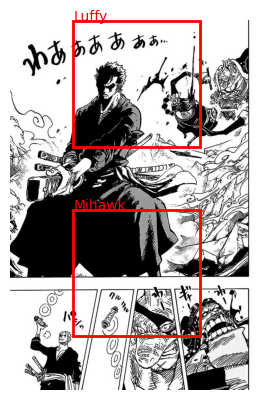

In [87]:
# Detector model
class DetectorFromClassifier:
    def __init__(self, classifier):
        self.classifier = classifier
        self.divisor = 2
    
    def detect(self, image_path, confidence_threshold = 0.6):
        last_predictions_coordinates = []
        # create a moving window
        image = Image.open(image_path)
        width, height = image.size
        window_width = width // self.divisor
        window_height = height // self.divisor
        window_size = min(window_width, window_height)
        step_size = window_size // self.divisor # step size is used to move the window
        predictions = []
        for y in range(0, height - window_size, step_size):
            for x in range(0, width - window_size, step_size):
                # corta utilizando o sliding window e o step size
                window = image.crop((x, y, x + window_size, y + window_size))
                window_path = "temp.jpg"
                window.save(window_path)
                class_name, probability, general_probabilitys = self.classifier.predict(window_path)
                general_sum = np.sum(general_probabilitys) # soma das probabilidades para detectar a "disposição a dar uma resposta, é geralmente menos no background, mas é uma gambiarra"
                if probability > confidence_threshold and general_sum > 1:
                    # save the window coordinates
                    x_init = x
                    y_init = y
                    x_end = x + window_size
                    y_end = y + window_size
                    last_predictions_coordinates.append((class_name, x_init, y_init, x_end, y_end))
                    print("geral", general_probabilitys)
                    print(class_name, probability)
                    predictions.append((class_name, x, y))
        return predictions, last_predictions_coordinates
    
    def detect_and_plot(self, image_path):
        # plot the windows using the coordinates
        image = Image.open(image_path)
        predictions, coordinates = self.detect(image_path)
        plt.imshow(image)
        plt.axis("off") 
        for class_name, x_init, y_init, x_end, y_end in coordinates:
            plt.gca().add_patch(plt.Rectangle((x_init, y_init), x_end - x_init, y_end - y_init, fill=False, edgecolor="red", linewidth=2))
            plt.text(x_init, y_init, class_name, color="red")


# Create the detector
detector = DetectorFromClassifier(classifier)
# Detect and plot the image
adicional_test = 'teste6.jpeg'
detector.detect_and_plot(adicional_test)
plt.show()

        